# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_data = pd.merge(study_results,mouse_metadata,on='Mouse ID')

# Display the data table for preview
combine_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [159]:
# Checking the number of mice.
mice_number = combine_data['Mouse ID'].nunique()
mice_number

248

In [107]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRows = combine_data[combine_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicateRows['Mouse ID'].unique()

array(['g989'], dtype=object)

In [88]:
# # Optional: Get all the data for the duplicate mouse ID. 
duplicateRows = combine_data.loc[combine_data['Mouse ID'] == 'g989',:]
duplicateRows

In [160]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combine_data.drop(combine_data.index[combine_data['Mouse ID'] == 'g989'], inplace=True)
combine_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [158]:
# Checking the number of mice in the clean DataFrame.
combine_data['Mouse ID'].nunique()

248

## Summary Statistics

In [163]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_volume = combine_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_tumor_volume = combine_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumor_volume_variance = combine_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumor_volume_std = combine_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumor_std_err = combine_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

summary_table = pd.DataFrame({
    'Mean Tumor Volume':mean_tumor_volume,
    'Median Tumor Volume':median_tumor_volume,
    'Tumor Volume Variance':tumor_volume_variance,
    'Tumor Volume Std. Dev.':tumor_volume_std,
    'Tumor Volume Std. Err.':tumor_std_err,
})
summary_table.index.name = None
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [110]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_table_agg = combine_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    std_err='sem'
).reset_index()
summary_table_agg

,Drug Regimen,mean,median,variance,std_dev,std_err
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

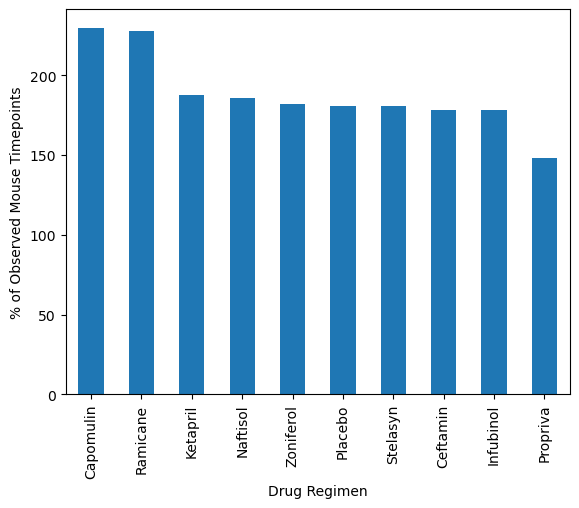

In [111]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
            
regimen_mouse_timepoints_df = combine_data.groupby(combine_data['Drug Regimen'])['Tumor Volume (mm3)'].count().sort_values(ascending=False)

# plot
regimen_mouse_timepoints_df.plot(kind='bar', figsize=(6.5,5)) 

# Set labels and title
plt.xlabel('Drug Regimen')           
plt.ylabel('% of Observed Mouse Timepoints')

# show plot
plt.show()


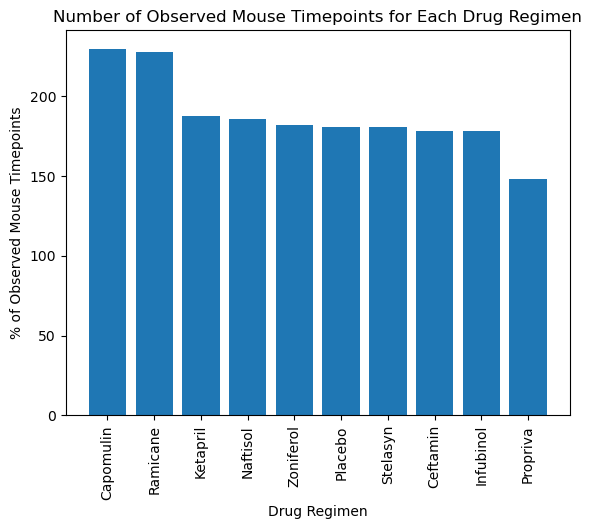

In [164]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Calculate the count of timepoints for each drug regimen
regimen_mouse_timepoints_df = combine_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].count().sort_values(ascending=False)

x_axis = regimen_mouse_timepoints_df.index
y_axis = regimen_mouse_timepoints_df

# Plot the bar chart
plt.figure(figsize=(6.5, 5))
plt.bar(x_axis, y_axis)

# Set labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('% of Observed Mouse Timepoints')
plt.title('Number of Observed Mouse Timepoints for Each Drug Regimen')
plt.xticks(rotation='vertical')

# Show plot
plt.show()

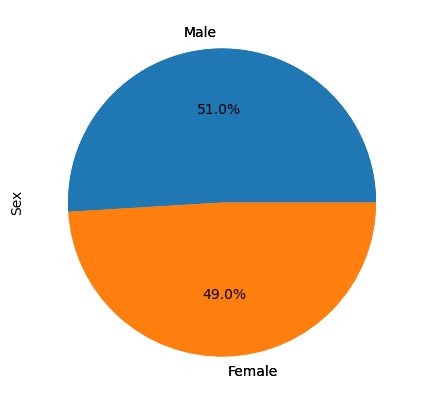

In [165]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# gender_df = combine_data.groupby(['Sex'])['Sex'].count()

gender_df = combine_data.groupby(['Sex'])['Sex'].count()

sex_mouse_timepoints_df.plot(kind='pie', figsize=(6.5,5))

sex_mouse_timepoints_pandas_df = sex_mouse_timepoints_df.plot(kind= 'pie', y='Sex',autopct='%.1f%%')

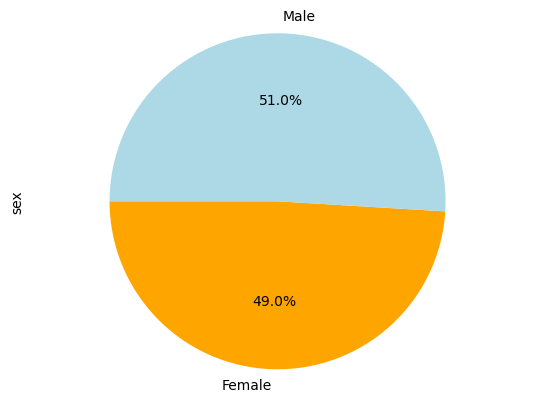

In [166]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df = combine_data.groupby(['Sex'])['Sex'].count()

sizes = gender_df 
labels = ['Female', 'Male']
labeldistance = 1.1
colors=['orange', 'lightblue']
autopct = '%1.1f%%'
startangle = 180      

plt.pie(
    sizes,
    labels=labels,
    labeldistance=labeldistance,
    colors=colors,
    autopct=autopct,
    startangle=startangle,
)
plt.axis("equal")
plt.ylabel('sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [167]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_timepoint_df = combine_data.groupby(['Mouse ID'], as_index=True, sort=True)['Timepoint'].max() 
mouse_timepoint_df = mouse_timepoint_df.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_combinied_df = mouse_timepoint_df.merge(combine_data, on=['Mouse ID', 'Timepoint'], how='left')

In [143]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']    # no need to drop other siz drugs

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for drug in treatments:     # for each drug in list of treatments
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    per_drug_tumor_vol = merged_combinied_df.loc[merged_combinied_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(per_drug_tumor_vol)

    
    # Determine outliers using upper and lower bounds
    quartiles = per_drug_tumor_vol.quantile([0.25, 0.50, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq 
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = per_drug_tumor_vol.loc[(per_drug_tumor_vol < lower_bound) | (per_drug_tumor_vol > upper_bound)]
    print(f"{drug}'s potential ouliers: {outliers}")

Capomulin's potential ouliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential ouliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential ouliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential ouliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


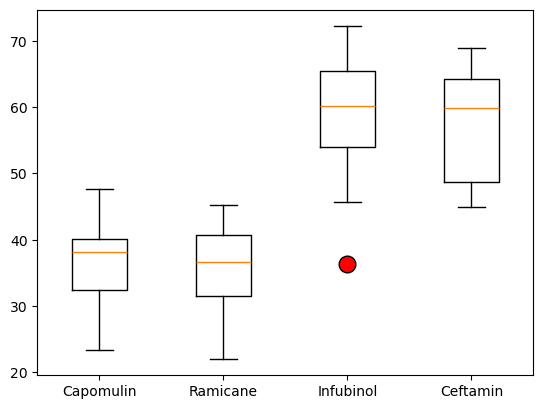

In [144]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax1 = plt.subplots(figsize=(6.4,4.75))

            
ax1.boxplot(tumor_vol_data,
            vert=True,             
            patch_artist=False,     
            labels=treatments,
            flierprops={'marker': 'o', 'markersize': 12, 'markerfacecolor': 'red'} 
           ) 
plt.show()

## Line and Scatter Plots

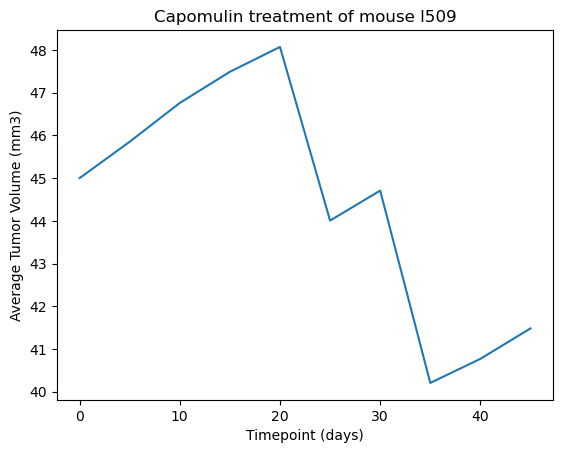

In [146]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

l509_df = combine_data[['Mouse ID', 'Timepoint','Tumor Volume (mm3)']] 
l509_df = l509_df.loc[l509_df['Mouse ID'] == 'l509']
l509_df_timepoint = l509_df[['Timepoint']]
l509_df_tumor_vol = l509_df[['Tumor Volume (mm3)']] 

tumor_vol_v_timepoint, = plt.plot(l509_df_timepoint, 
                                  l509_df_tumor_vol)
plt.xlabel('Timepoint (days)')           
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

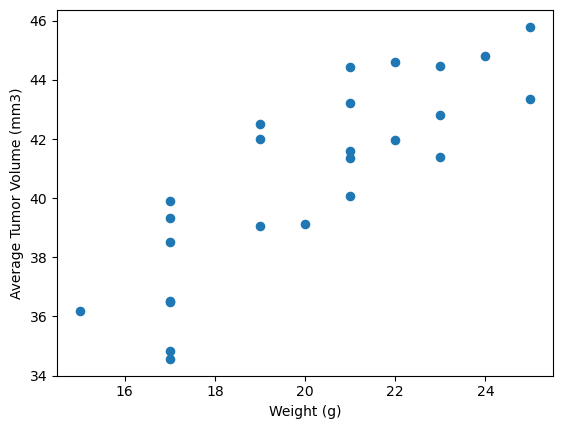

In [148]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_vol_df = combine_data.groupby(['Drug Regimen', 'Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean() 

avg_tumor_vol_df = avg_tumor_vol_df.reset_index()

Capomulin_avg_tumor_vol_df = avg_tumor_vol_df.loc[avg_tumor_vol_df['Drug Regimen'] == 'Capomulin']

fig, ax1 = plt.subplots(figsize=(6.4,4.75))

            
plt.scatter(Capomulin_avg_tumor_vol_df['Weight (g)'],Capomulin_avg_tumor_vol_df['Tumor Volume (mm3)'], s=35) 
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84 


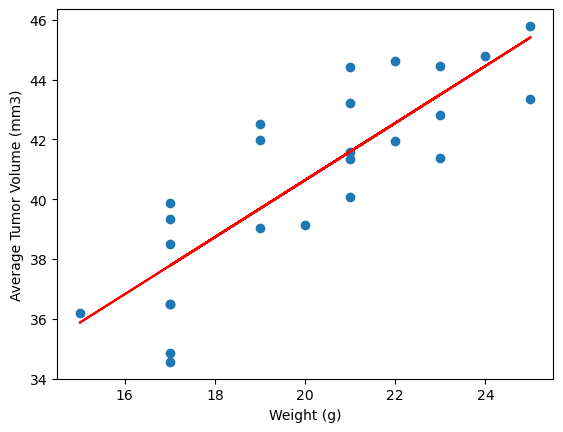

In [156]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


from scipy.stats import linregress

x_values = Capomulin_avg_tumor_vol_df['Weight (g)']
y_values = Capomulin_avg_tumor_vol_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show;   

correlation = Capomulin_avg_tumor_vol_df['Weight (g)'].corr(Capomulin_avg_tumor_vol_df['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f} ", )